# USA House Prices Analysis & Prediction
The goal of this project is to explore and understand the factors influencing the real estate market in the United States and build machine learning models to accurately predict house prices.

During EDA, we aim to:

+ Identify key factors that influence house prices (e.g., location, size, number of rooms, year built).
+ Detect outliers and anomalies in the dataset.
+ Analyze the distribution of house prices and uncover trends.
+ Explore correlations between property features and prices.

> Source data: https://www.kaggle.com/datasets/farhankarim1/usa-house-prices

## Import libs

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Import raw data

In [112]:
import os
import sys
from google.colab import drive

try:
  drive.mount('/content/drive')
  project_path = "/content/drive/MyDrive/Pytorch pet projects/ML - Projects/ML - USA HOUSE PRICES"
  sys.path.append(os.path.join(project_path, "src"))

  path = "/content/drive/MyDrive/Pytorch pet projects/ML - Projects/ML - USA HOUSE PRICES/data/raw/USA_Housing.csv"
except:
  path = "../data/raw/USA_Housing.csv"



df = pd.read_csv(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Discover data

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [114]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## Feature engineering
+ Address features in this form is not the most usable.
Creating new features base on ```Address```

In [115]:
# How many of the address contains Military address?
df["Military_address"] = df["Address"].str.extract(r"\b(APO|FPO|DPO)\b", expand=True)
mil_add = df["Military_address"].notna().sum()
print(f"{mil_add} of the address is contains 'APO/FPO/DPO' use a specific set of ZIP Codes assigned to military locations.")

514 of the address is contains 'APO/FPO/DPO' use a specific set of ZIP Codes assigned to military locations.


In [116]:
# Remove the military address
df.drop(df[df['Military_address'].notna()].index, inplace=True)

# Split the Address to Steet and to the City+State+Zip
df[["Street", "CityStateZip"]] = df["Address"].str.split("\n", expand=True)
df[["City", "StateZip"]] = df["CityStateZip"].str.split(", ", expand=True)
df[["State", "Zip"]] = df["StateZip"].str.split(" ", n=1, expand=True)

df.drop(columns=["Address", "CityStateZip", "StateZip", "Military_address"], axis=1, inplace=True)
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Street,City,State,Zip
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,208 Michael Ferry Apt. 674,Laurabury,NE,37010-5101
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,188 Johnson Views Suite 079,Lake Kathleen,CA,48958
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,9127 Elizabeth Stravenue,Danieltown,WI,06482-3489
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,06039 Jennifer Islands Apt. 443,Tracyport,KS,16077
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,4759 Daniel Shoals Suite 442,Nguyenburgh,CO,20247


## Examining categories and numerical variables

In [117]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
float_cols = df.select_dtypes(include=['float']).columns.tolist()

print(f"Objects: ${cat_cols}")
print(f"Floats: ${float_cols}")

# Turn Object to categroy
df[cat_cols] = df[cat_cols].astype("category")

Objects: $['Street', 'City', 'State', 'Zip']
Floats: $['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4486 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Avg. Area Income              4486 non-null   float64 
 1   Avg. Area House Age           4486 non-null   float64 
 2   Avg. Area Number of Rooms     4486 non-null   float64 
 3   Avg. Area Number of Bedrooms  4486 non-null   float64 
 4   Area Population               4486 non-null   float64 
 5   Price                         4486 non-null   float64 
 6   Street                        4486 non-null   category
 7   City                          4486 non-null   category
 8   State                         4486 non-null   category
 9   Zip                           4486 non-null   category
dtypes: category(4), float64(6)
memory usage: 766.0 KB


In [119]:
%%writefile  visualization.py

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def show_boxplots(columns: list, df: pd.DataFrame) -> None:
  """
  Creates boxplots for float-type features in the given DataFrame.

    Args:
        columns (list): List of feature names that are of float type.
        df (pd.DataFrame): The DataFrame containing the features.

    Returns:
        None: Displays the boxplots in a grid with up to 3 columns per row.
  """
  row = max(1, np.ceil(len(columns) / 3).astype(int))
  fig, axes = plt.subplots(row, 3, figsize=(15, 5 * row))

  if row == 1:
      axes = np.array(axes).reshape(1, -1)

  for index, name in enumerate(columns):
      r, c = divmod(index, 3)
      sns.boxplot(y=name, data=df, ax=axes[r, c])

  plt.tight_layout()
  plt.show()

Overwriting visualization.py


In [120]:
%%writefile data_processing.py

import pandas as pd

def remove_outliers_iqr(columns: list, df: pd.DataFrame) -> pd.DataFrame:
  """
    Removes outliers from the specified columns of a DataFrame using the IQR method.

    The function calculates the interquartile range (IQR) for the given columns and
    removes rows where values are outside the lower and upper bounds
    (Q1 - 1.5 * IQR and Q3 + 1.5 * IQR).

    Args:
        columns (list): List of column names from which outliers should be removed.
        df (pd.DataFrame): The DataFrame containing the data.

    Returns:
        pd.DataFrame: A new DataFrame with outliers removed from the specified columns.
    """
  Q1 = df[columns].quantile(0.25)
  Q3 = df[columns].quantile(0.75)

  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[columns] >= lower_bound) & (df[columns] <= upper_bound)]

Overwriting data_processing.py


### Remove outliers (IQR)

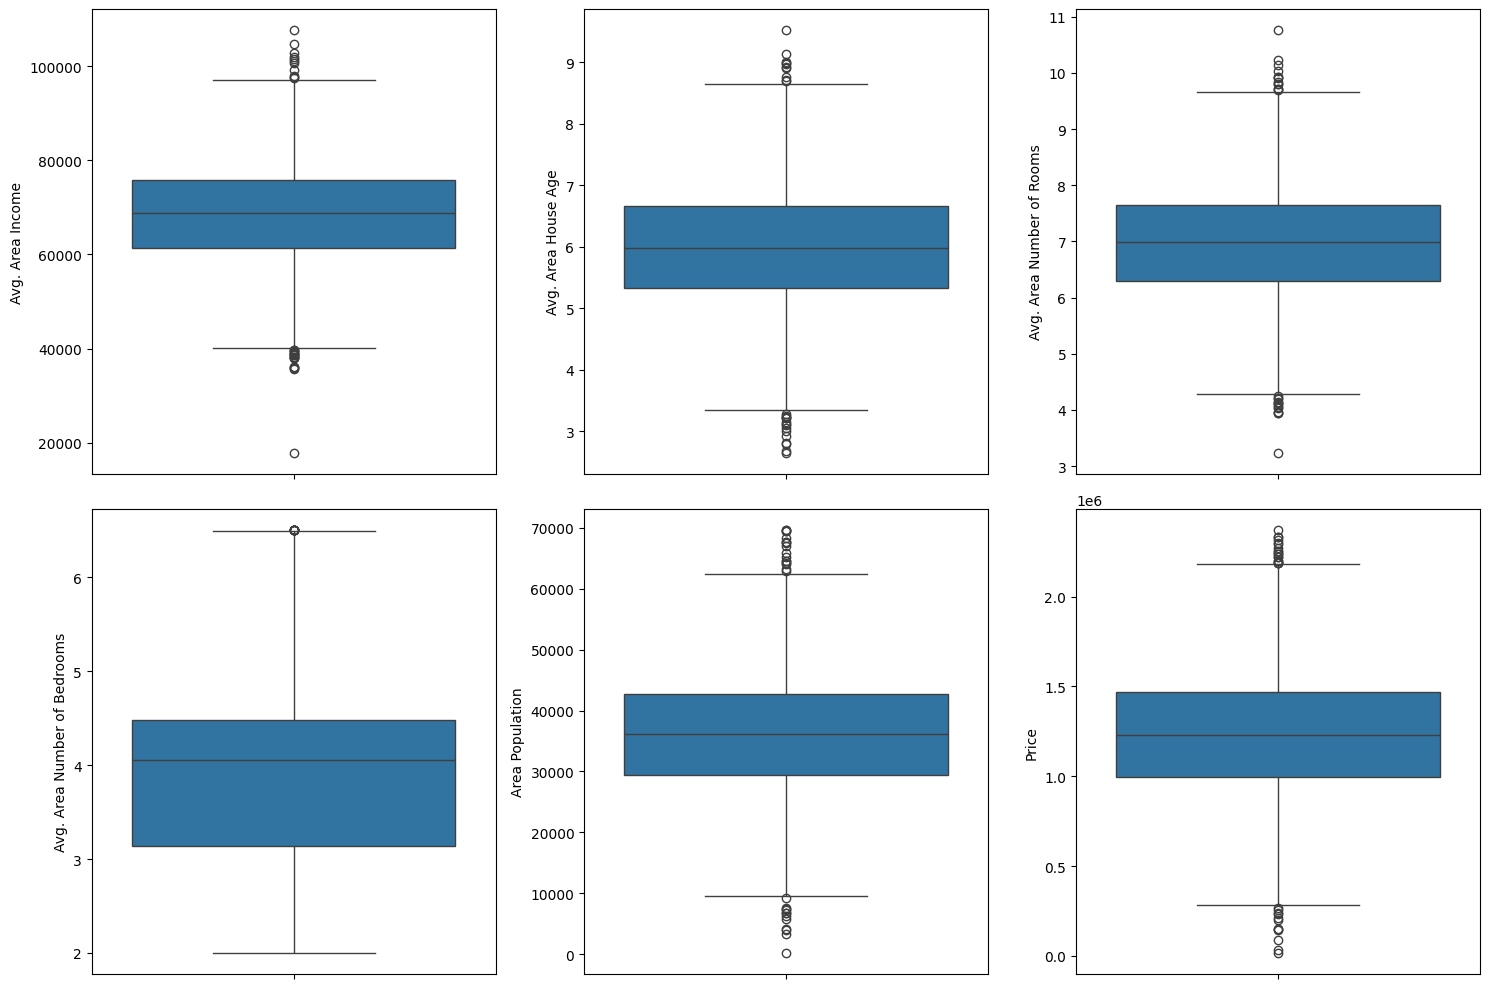

In [121]:
show_boxplots(float_cols, df)

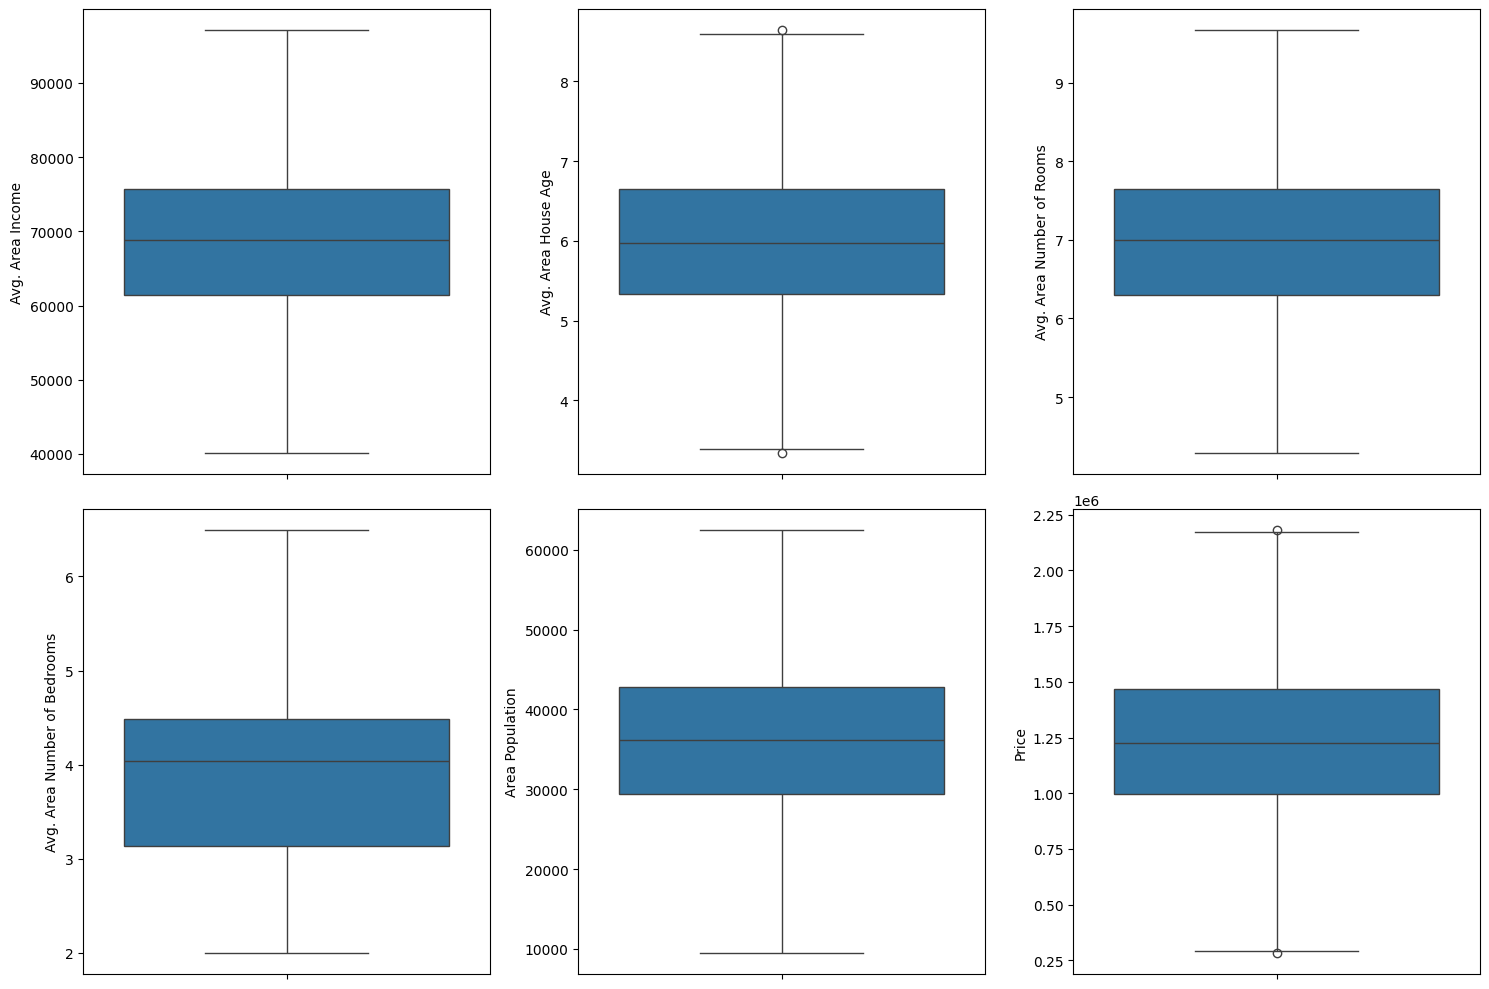

In [122]:
df = remove_outliers_iqr(float_cols, df)
show_boxplots(float_cols, df)